## Top Data Science Friendly Companies For International Students
### Author : Rohan Singh Rajput
### Published Data : August 30, 2017
### Website : [https://rohan0401.github.io/](https://rohan0401.github.io/)

#### Description : 
This is an extension of my earlier project which is python based visualization project for the H1B visa analysis, plesae follow this [https://goo.gl/G7MBFg] for my previous project.This analysis is more centred towards the companies which can help international student to find the entry level job in Data Science field. The struggle is real and it would take a long path before you actually get a dream role but if you work hard everything is possible. So let's start this journey with a small step. In this project we try to utilize python for our insight get help from it. The data for this project is collected from myvisa website. This is just a demostration to get some insight of the last year work visa comapanies. The proejct is not fully complete and I would be happy to take your suggestion for this. Plase fork my github repo for any further enhancement of this project.

* Before starting our project lets start with some libraries. These libraries help to get the work done in effective manners

In [3]:
import urllib3 # Module to fetch web info 
from bs4 import BeautifulSoup # To clear the html data 
import pandas as pd # To analyse the analyse
import matplotlib.pyplot as plt # To draw plots
import numpy as np # Mathematics
import math # To perform math operation
import seaborn as sns # Visualization library
import matplotlib.cm as cm # library for plotting
%matplotlib inline    
import warnings 
warnings.filterwarnings("ignore")

## Being a Data Science lover lets start it with some intresting steps 
**Data extreaction and cleaning** – We will extract the data using python request library. Keeping in mind that the data we get form the website is not in plain text format. so we will use following procedure to deal with this type of data. 
 - First the data will be fetched from the website using request module, it will provide us the data in html format.
 - This data will be parsed using Beautiful Soup python module which can provide us data for respective tags.
 - After getting the right the table data would be paresed into pandas dataframe

In [4]:
url = 'https://www.myvisajobs.com/Reports/2017-H1B-Visa-Category.aspx?T=JT' # This is the url of the website where we will pull the data
number_of_page = 4

In [5]:
def get_info(url):
    """
       
    This function takes cleans and transform the html data into pandas dataframe
    param    
    url    : Url for the website 
    return : Dataframes cotaning the data 
    """
    https = urllib3.PoolManager()
    r = https.request('GET', url)
    process = r.data
    soup = BeautifulSoup(process, 'html.parser')
    right_table = soup.find('table', class_ = 'tbl')
    A=[]
    B=[]
    C=[]
    D=[]
    for row in right_table.findAll("tr"):
        cells = row.findAll('td')
        if len(cells)> 1: #Only extract table body not heading
            A.append(cells[0].find(text=True))
            B.append(cells[1].find(text=True))
            C.append(cells[2].find(text=True))
            D.append(cells[3].find(text=True))
    return A , B , C ,D
    
    

This collect the data and merge into single dataframe 

In [6]:
col1 , col2 , col3 , col4 = [], [], [], []
for i in range(number_of_page):
    if  i == 0:
        input_url = url
        col1 , col2, col3 , col4 = get_info(input_url)
        
    else:
        A , B , C, D = [], [], [], []
        input_url = url + '&P=' + str(i + 1)
        A , B, C , D = get_info(input_url)
        col1 = col1 + A[1:]
        col2 = col2 + B[1:]
        col3 = col3 + C[1:]
        col4 = col4 + D[1:]
        
        
        
        

We rename the colomns to get the better intutions of the fields

In [7]:
df=pd.DataFrame(col1,columns=['Number'])
df['Job Title']=col2
df['Number of Application']=col3
df['Average Salary']=col4

In [8]:
df =  df.drop(df.index[0]) # Drop the header of first row

In [9]:
df = df.drop('Number',1)

Remove extra spaces form the colomn 

In [10]:
rem_comma = lambda s : s.replace(',','')
rem_dollar = lambda s : s.replace('$','')

df['Number of Application'] = df['Number of Application'].apply(rem_comma)
df['Average Salary'] = df['Average Salary'].apply(rem_dollar)
df['Average Salary'] = df['Average Salary'].apply(rem_comma)

Get the info about the fields we created 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 3 columns):
Job Title                200 non-null object
Number of Application    200 non-null object
Average Salary           200 non-null object
dtypes: object(3)
memory usage: 6.2+ KB


Here we change the data types of the numeric field to correct format 

In [12]:
df['Number of Application'] = df['Number of Application'].astype('int')
df['Average Salary'] = df['Average Salary'].astype('int')

Let's have the quick peek of our work 

In [33]:
df

,JobTitle,NumOfApp,AvgSal,SalarySize,PerApp,Is_data_science
1,Programmer Analyst,53738,67421,Medium,15.182714,N
2,Software Engineer,30666,95081,Medium,8.664131,N
3,Software Developer,14038,76698,Medium,3.966187,N
4,Systems Analyst,12311,70809,Medium,3.478253,N
5,Computer Programmer,11668,67063,Medium,3.296585,N
6,Business Analyst,9167,70240,Medium,2.589972,M
7,Computer Systems Analyst,6899,71858,Medium,1.949189,N
8,Senior Software Engineer,6437,117634,Big,1.818660,N
9,Developer,6084,76416,Medium,1.718926,N
10,Technology Lead - Us,5410,81570,Medium,1.528499,N


The above dataframe contains information of all the job title related to the field along with the number of application processed and the average salary of the visa applicant.Now we have to process it to get a better insight of the data. 

**Feature Engineering :** Let's include some more information to get some more insight about the data

In [14]:
def group_company(x):
    """This function catergories the data into three class small, medium and large."""
    if x < 65000:
        return 'Small'
    elif x < 100000:
        return 'Medium'
    else:
        return 'Big'

In [15]:
df=df.rename(columns = {'Number of Application':'NumOfApp'})

In [16]:
df=df.rename(columns = {'Average Salary':'AvgSal'})

In [17]:
df=df.rename(columns = {'Job Title':'JobTitle'})

In [18]:
df['SalarySize'] = df.AvgSal.apply(group_company)

In [19]:
list_of_ds_comp = ['Business Analyst', 'Database Administrator', 'Data Analyst', 'Senior Business Analyst','Data Analyst 2', 'Analyst']

In [20]:
def per_cent(x):
    """This fuction converts the number into percentage"""
    total = df.NumOfApp.sum()
    return (x/total)*100

def ds_cat(s):
    """This function flages potential data science catagories from the dataframe"""
    if s in list_of_ds_comp: 
        x = 'M'
    elif s == 'Data Scientist':
        x = 'Y'
    else:
        x = 'N'
    return x
     
    

In [21]:
df['PerApp'] = df.NumOfApp.apply(per_cent)

In [22]:
df['Is_data_science'] = df.JobTitle.apply(ds_cat)

We have included two more catagories in our dataframes

In [23]:
df_data_science = df[df.Is_data_science.str.contains('M') | df.Is_data_science.str.contains('Y')]

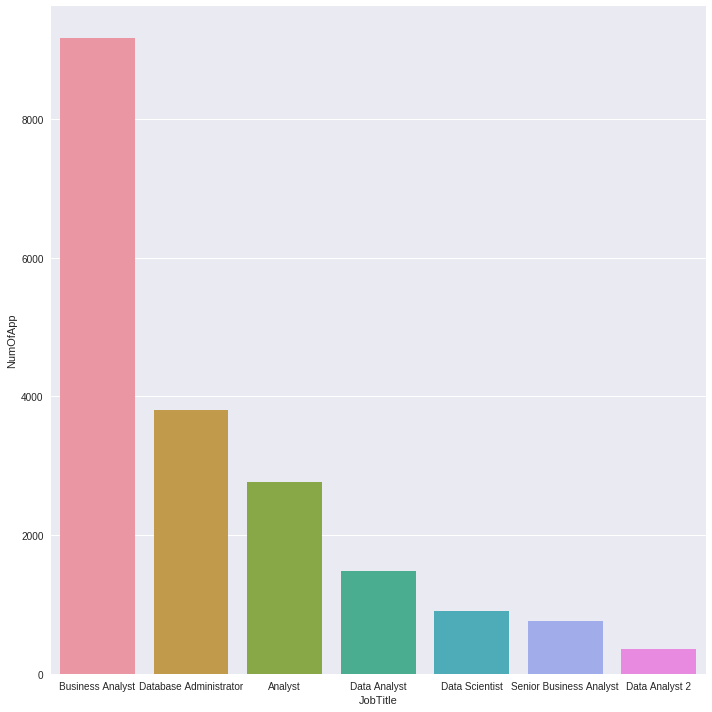

In [24]:
sns.factorplot(x ='JobTitle', y = 'NumOfApp', data = df_data_science, kind='bar', size=10)


**Visualization :**Now get some visualizations to understand the big picture 

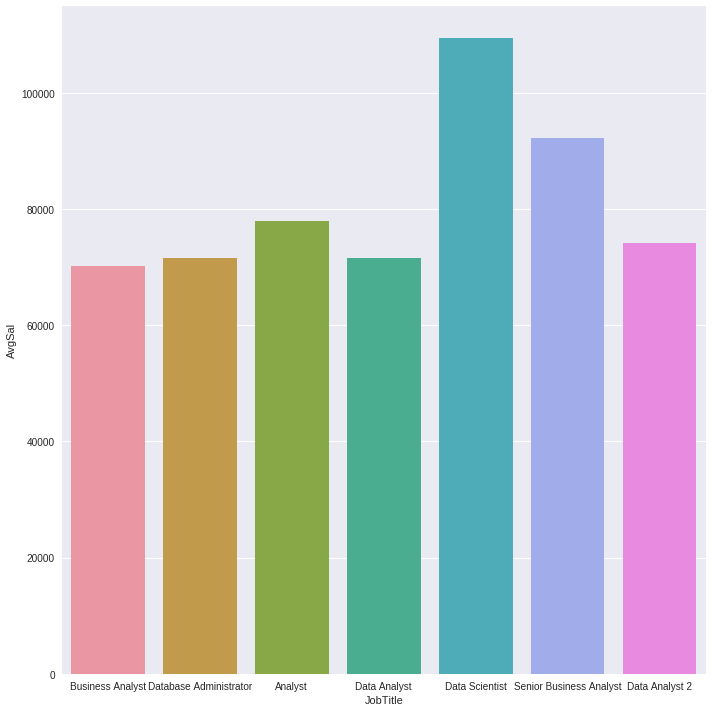

In [25]:
sns.factorplot(x ='JobTitle', y = 'AvgSal', data = df_data_science, kind='bar', size=10)

This provides the intution that 60 percentage of the data is in medium range 

In [26]:
url_pos = "https://www.myvisajobs.com/"

In [27]:


def get_info_pos(title,url):
    input_url = url + title.replace(" ", "-") + "-2017JT.htm"
    col1 , col2, col3 , col4 = get_info(input_url)
    df=pd.DataFrame(col1,columns=['Number'])
    df['Company']=col2
    df['Number of Application']=col3
    df['Average Salary']=col4
    df =  df.drop(df.index[0]) # Drop the header of first row
    df = df.drop('Number',1)
    rem_comma = lambda s : s.replace(',','')
    rem_dollar = lambda s : s.replace('$','')
    df['Number of Application'] = df['Number of Application'].apply(rem_comma)
    df['Average Salary'] = df['Average Salary'].apply(rem_dollar)
    df['Average Salary'] = df['Average Salary'].apply(rem_comma)
    df['Number of Application'] = df['Number of Application'].astype('int')
    df['Average Salary'] = df['Average Salary'].astype('int')
    return df
    

In [28]:
def get_plot(ele):
    df_pos = get_info_pos(ele, url_pos)[:20]
    # Choose some random colors
    N = len(df_pos)
    colors=cm.rainbow(np.random.rand(N))
    plt.figure(figsize=(15,10))

    # Use those colors as the color argument
    plt.scatter(df_pos['Number of Application'],df_pos['Average Salary'],s =df_pos['Number of Application']*20, color=colors)
    #plt.scatter(df_pos['Average Salary'],df_pos['Number of Application'], color=colors)
    for i in range(1,N+1):
        plt.annotate(df_pos['Company'][i],xy=(df_pos['Number of Application'][i], df_pos['Average Salary'][i]))
    plt.xlabel('Number of Application')
    plt.ylabel('Average Salary')

    # Move title up with the "y" option
    plt.title('Top ' + str(N) + ' companies info with Number of Application and Average Salary for ' + ele + ' position')
    return plt.show(), df_pos
    

In [29]:
complete_list = list_of_ds_comp + ['Data Scientist']

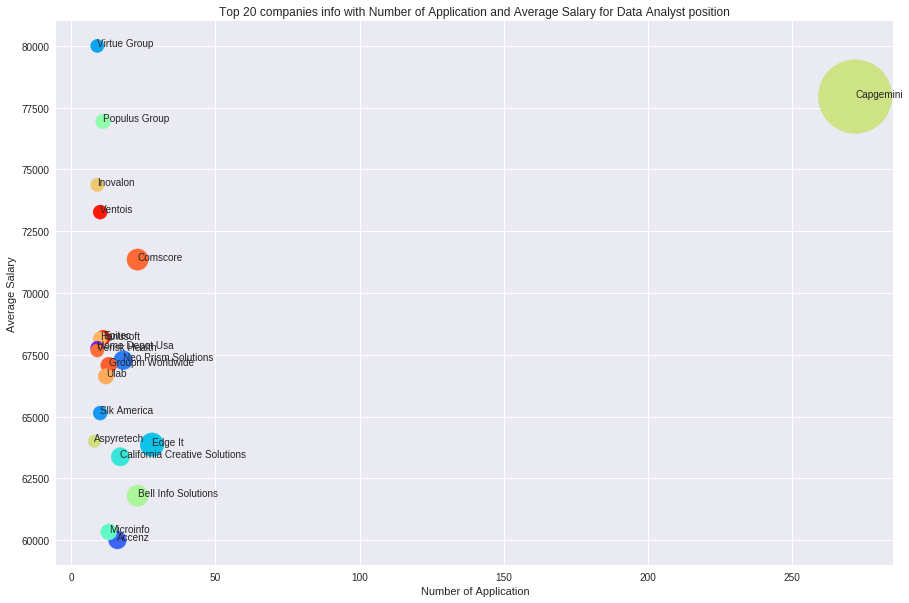

In [39]:
_ , t = get_plot(complete_list[2])

In [40]:
t

,Company,Number of Application,Average Salary
1,Capgemini,272,77950
2,Edge It,28,63861
3,Comscore,23,71353
4,Bell Info Solutions,23,61796
5,Neo Prism Solutions,18,67278
6,California Creative Solutions,17,63371
7,Accenz,16,60000
8,Groupm Worldwide,13,67077
9,Microinfo,13,60330
10,Ulab,12,66625


Now lets see some relationship between median salary and size of the company 

Now lets see the relation between average salary and percentage of the application 

The regression plot doesn't provide us the intutive value so lets try a new plotpy interactive graph

This visual analysis shows the percentage of applications along with the average salaries for those visa. Majorities of visas go for the medium scale pay, large scale pay having less percentage of applications. 
Although we still have to consider lots of factors here, the position type and location but for this intial charts can be helpful to find the companies who file large portions of the applications. The salary expectation can also be taken out from this dashboard.